In [39]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from astropy import table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.cosmology import Planck15 as cosmo
import h5py

# Test the TDE separations from using MXINTFLUX=0.2 in a 10k run

In [40]:
transDir = "/global/cscratch1/sd/kessler/SNANA_LSST_SIM/MLAG_SCOTCH10k_TDE/"
TDE_heads = []
for selection in ('0003', '0012', '0024', '0032'): # some random head files
    TDE_head_fn = transDir + "MLAG_GP_SCOTCH10k_Z3_MXINTFLUX_NONIaMODEL0-{:s}_HEAD.FITS.gz".format(selection)
    TDE_head = table.Table.read(TDE_head_fn, format='fits').to_pandas()
    TDE_heads.append(TDE_head)
TDE = pd.concat(TDE_heads)

In [41]:
c2 = SkyCoord(TDE['HOSTGAL_RA'].values*u.deg, TDE['HOSTGAL_DEC'].values*u.deg, frame='icrs')
c1 = SkyCoord(0.0*u.deg, 0.0*u.deg, frame='icrs')
sep_tde = c1.separation(c2)
redshift_tde = np.asarray(TDE['HOSTGAL_SPECZ'])
sep_phys_tde = cosmo.kpc_proper_per_arcmin(redshift_tde)*sep_tde.to(u.arcmin)
tde_hostgal_rad = TDE['HOSTGAL_SQRADIUS']

Text(0.5, 0, 'Separation in kpc proper')

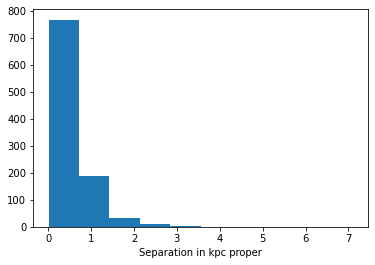

In [42]:
plt.hist(sep_phys_tde.value)
plt.xlabel("Separation in kpc proper")

Text(0.5, 0, 'Separation in arcsec')

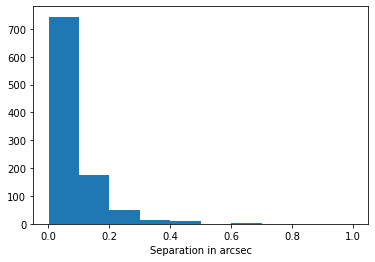

In [43]:
plt.hist(sep_tde.to(u.arcsec).value)
plt.xlabel("Separation in arcsec")

In [44]:
# compare with a more typical transient from SCOTCH
f    = h5py.File("/global/cscratch1/sd/mlokken/sn_hostenv/scotch_submitted/scotch_z3.hdf5", "a")
slsn = f['TransientTable']['SLSN-I']['SLSN-I']
sep_slsn  = list(slsn['sep'][0:1000])
redshift_slsn    = list(slsn['z'][0:1000])

Text(0.5, 0, 'Separation in kpc proper')

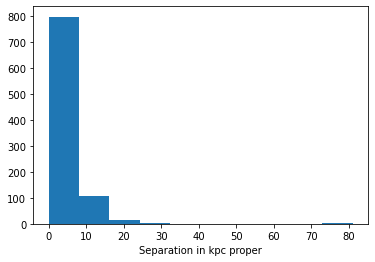

In [45]:
sep_phys_slsn = cosmo.kpc_proper_per_arcmin(redshift_slsn).to(u.kpc/u.arcsec)*sep_slsn*u.arcsec
plt.hist(sep_phys_slsn.value)
plt.xlabel("Separation in kpc proper")

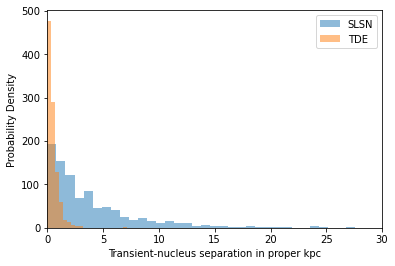

In [46]:
plt.hist(sep_phys_slsn.value, label='SLSN', alpha=.5, bins=100)
plt.hist(sep_phys_tde.value, label='TDE', alpha=.5, bins=20)
plt.xlabel("Transient-nucleus separation in proper kpc")
plt.ylabel("Probability Density")
plt.xlim([0,30])
plt.legend()

# Repeat for KN

In [47]:
transDir = "/global/cscratch1/sd/kessler/SNANA_LSST_SIM/MLAG_SCOTCH10k_KN_K17/"

KN_heads = []
for selection in ('0003', '0012', '0024', '0032'): # some random head files
    KN_head_fn = transDir + "MLAG_GP_SCOTCH10k_KN_MNINTFLUX_NONIaMODEL0-{:s}_HEAD.FITS.gz".format(selection)
    KN_head = table.Table.read(KN_head_fn, format='fits').to_pandas()
    KN_heads.append(KN_head)
KN = pd.concat(KN_heads)

In [48]:
KN['HOSTGAL_ELLIPTICITY'].iloc[np.where(KN['HOSTGAL_DEC']==-999)]

16    -9999.0
17    -9999.0
23    -9999.0
50    -9999.0
54    -9999.0
        ...  
215   -9999.0
221   -9999.0
222   -9999.0
234   -9999.0
249   -9999.0
Name: HOSTGAL_ELLIPTICITY, Length: 80, dtype: float32

Text(0.5, 0, 'arcsec')

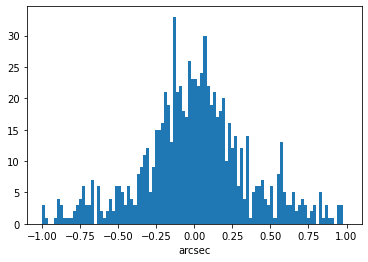

In [49]:
plt.hist(KN['HOSTGAL_DEC']*3600, range=[-1,1], bins=100)
plt.xlabel("arcsec")

Text(0.5, 0, 'RA [arcsec]')

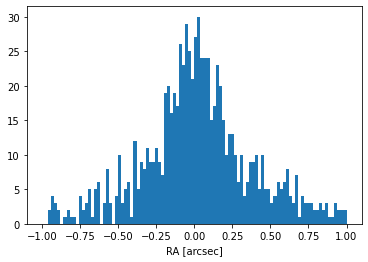

In [50]:
plt.hist(KN['HOSTGAL_RA']*3600, range=[-1,1], bins=100)
plt.xlabel("RA [arcsec]")

In [51]:
KN = KN.iloc[np.where(KN['HOSTGAL_RA']!=-999)]
# there is a problem with -999s

In [52]:
c2 = SkyCoord(KN['HOSTGAL_RA'].values*u.deg, KN['HOSTGAL_DEC'].values*u.deg, frame='icrs')
c1 = SkyCoord(0.0*u.deg, 0.0*u.deg, frame='icrs')
sep_kn = c1.separation(c2)
redshift_kn = np.asarray(KN['HOSTGAL_SPECZ'])
sep_phys_kn = cosmo.kpc_proper_per_arcmin(redshift_kn)*sep_kn.to(u.arcmin)
kn_hostgal_rad = KN['HOSTGAL_SQRADIUS']

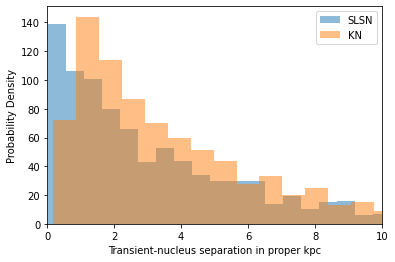

In [53]:
plt.hist(sep_phys_slsn.value, label='SLSN', alpha=.5, bins=150)
plt.hist(sep_phys_kn.value, label='KN', alpha=.5, bins=100)
plt.xlabel("Transient-nucleus separation in proper kpc")
plt.ylabel("Probability Density")
plt.xlim([0,10])
plt.legend()

# Test the new AGN separations from using MXINTFLUX=0.1 in the full runs, compare to original SCOTCH

In [54]:
scotch = h5py.File("/global/cscratch1/sd/mlokken/sn_hostenv/scotch_submitted/scotch_z3.hdf5", "r")

In [55]:
scotch_trans = scotch['TransientTable']

In [56]:
sep_AGN_scotch = scotch_trans['AGN']['AGN01']['sep'][:]
scotch.close()

In [57]:
# new AGN
transDir = "/global/cscratch1/sd/kessler/SNANA_LSST_SIM/MLAG_SCOTCH_Z3_AGN01/"
AGN_heads = []
for selection in ('0003', '0012', '0024', '0032'): # some random head files
    AGN_head_fn = transDir + "MLAG_SCOTCH_Z3_AGN01_NONIaMODEL0-{:s}_HEAD.FITS.gz".format(selection)
    AGN_head = table.Table.read(AGN_head_fn, format='fits').to_pandas()
    AGN_heads.append(AGN_head)
AGN = pd.concat(AGN_heads)

In [58]:
c2 = SkyCoord(AGN['HOSTGAL_RA'].values*u.deg, AGN['HOSTGAL_DEC'].values*u.deg, frame='icrs')
c1 = SkyCoord(0.0*u.deg, 0.0*u.deg, frame='icrs')
sep_agn = c1.separation(c2)
redshift_agn = np.asarray(AGN['HOSTGAL_SPECZ'])
sep_phys_agn = cosmo.kpc_proper_per_arcmin(redshift_agn)*sep_agn.to(u.arcmin)
agn_hostgal_rad = AGN['HOSTGAL_SQRADIUS']

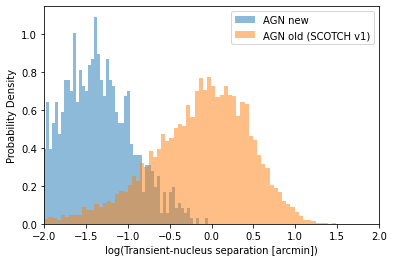

In [59]:
plt.hist(np.log10(sep_agn.to('arcsec').value), label='AGN new', alpha=.5, bins=100, density=True)
plt.hist(np.log10(sep_AGN_scotch), label='AGN old (SCOTCH v1)', alpha=.5, bins=100, density=True)
plt.xlabel("log(Transient-nucleus separation [arcmin])")
plt.ylabel("Probability Density")
plt.xlim([-2,2])
plt.legend()

(array([803., 124.,  38.,  17.,   9.,   3.,   4.,   1.,   0.,   1.]),
 array([2.39980607e-04, 9.06988190e-02, 1.81157657e-01, 2.71616496e-01,
        3.62075334e-01, 4.52534172e-01, 5.42993011e-01, 6.33451849e-01,
        7.23910688e-01, 8.14369526e-01, 9.04828364e-01]),
 <BarContainer object of 10 artists>)

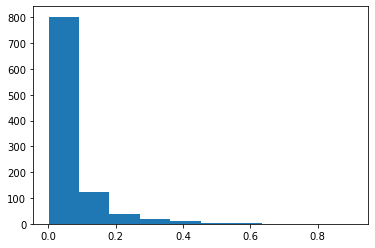

In [60]:
plt.hist(sep_agn.to("arcsec").value)